In [1]:
# data storage and handling
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

import string 

from datetime import datetime

# ignore warnings  
import warnings
warnings.filterwarnings('ignore')

In [2]:
date = '240523' # datetime.today().strftime('%d%m%y')
sample ='_base9' # full, base9, base5, smri, dti

respath = '/Users/Serena/Desktop/arterial_brain/results_'+date+'/'

def res_path(file, samp=sample, analysis_date = date):
    return(respath+file+samp+'_'+analysis_date+'.xlsx')

PATH_desc = res_path('1-Descriptives', samp='')
PATH_main = res_path('2-Results')
PATH_supp = res_path('3-SuppResults')
# PATH_sens = res_path('4-SensyResults', samp='')

In [3]:
def read_res_sheets(path, print_names = True):
    xl = pd.ExcelFile(path) # read multiple sheets
    res = list() # initiate list to store of all sheet names 
    # loop through the sheets and save the contents in separate dataframes
    for sheet in xl.sheet_names:
        # df_name = sheet.replace('~','_') # to avoid var names problems
        res.append(sheet)
        df = xl.parse(sheet) # convert to dataframe
        # set variables as index 
        if 'term' in df.columns: # linear model output
            df = df.set_index('term') 
        elif 'Var' in df.columns: # pre-imputation descriptives
            df['Var'] = df['Var'].str.strip()
            df = df.set_index('Var')
            
        # define outcome 
        if 'model' in df.columns:
            df['outcome'] = df['model'].str.split(" - ", expand = True)[0] # first word
            df['outcome'] = df['outcome'].apply(lambda x : x[1:] if str(x) in ['MFA','MMD'] else x) # replace with FA and MD
        
        globals()[sheet] = df
        
    if print_names: 
        print(res, '\n') # for reference 

    return([globals()[df] for df in res])

# ========================================================================================================

read_res_sheets(PATH_main);
read_res_sheets(PATH_supp);


['IMT', 'Dis', 'SBP', 'DBP', 'IMT_orig', 'Dis_orig', 'SBP_orig', 'DBP_orig'] 

['IMT_sexint', 'Dis_sexint', 'SBP_sexint', 'DBP_sexint', 'IMT_f', 'Dis_f', 'SBP_f', 'DBP_f', 'IMT_m', 'Dis_m', 'SBP_m', 'DBP_m', 'IMT_subc_vol', 'Dis_subc_vol', 'SBP_subc_vol', 'DBP_subc_vol', 'IMT_tract_FA', 'Dis_tract_FA', 'SBP_tract_FA', 'DBP_tract_FA', 'IMT_tract_MD', 'Dis_tract_MD', 'SBP_tract_MD', 'DBP_tract_MD', 'IMT_brain9', 'Dis_brain9', 'SBP_brain9', 'DBP_brain9', 'IMT_other', 'Dis_other', 'SBP_other', 'DBP_other', 'Inter_IMT-BP'] 



In [ ]:
# pd.set_option('display.float_format', lambda x: '%.2f' % x)
# pd.set_option('display.max_columns',None)
# d.describe()

# Descriptives

In [4]:
read_res_sheets(PATH_desc);

['pre_impfull', 'imp_cntfull', 'imp_catfull', 'imp_boyfull', 'imp_grlfull', 'imp_corfull', 'pre_impbase9', 'imp_cntbase9', 'imp_catbase9', 'imp_boybase9', 'imp_grlbase9', 'imp_corbase9', 'pre_impbase5', 'imp_cntbase5', 'imp_catbase5', 'imp_boybase5', 'imp_grlbase5', 'imp_corbase5', 'pre_impsmri', 'imp_cntsmri', 'imp_catsmri', 'imp_boysmri', 'imp_grlsmri', 'imp_corsmri', 'pre_impdti', 'imp_cntdti', 'imp_catdti', 'imp_boydti', 'imp_grldti', 'imp_cordti'] 



In [129]:
dt = {'sex':'', #'Sex, n(%)' # Male Female
    'ethn_cont':'', # 'Ethnicity, n(%) Western non-Western
    'gest_weight':'mean',# Gestational weight, grams, mean (SD)
    'gest_age_birth':'median',   # Getsational age, weeks, median [range]
    'parity':['first','second']+['≥third']*5, # Parity (0-9 / 0-8)
    'm_age':'mean', # Maternal age, years, mean (SD)
    'm_bmi_prepregn':'median', # Maternal BMI, kg/m2, median [range]
    'm_bmi_6':'median', 
    # 'm_educ_pregn':['low']*4 + ['mid','high'], # Maternal education, n (%)
    # 'm_educ_3':['low']*3 + ['mid','high'],
    'm_educ_6':['1low']*4 + ['2mid','3high'],
    'income_6':['1low']*3 + ['2mid']*5 + ['3high']*3,
    # 'height_6':'mean', # Height, cm, mean (SD)
    # 'bmi_6_z':'mean', # Body mass index z-score, mean (SD)
    # 'bmi_10_z':'mean',
    'age_10':'median', # Age (at ultrasound visit), years, median (range)
    'height_10':'mean', # Height, cm, mean (SD)
    'bmi_10':'median', # Body mass index, median (range)
    'imt_10':'mean', # Carotid intima-media thickness, mm, mean (SD)
    'dis_10':'mean', # Carotid distensibility, kPa−1×10−3, mean (SD)
    # 'sbp_6':'mean', # Systolic bood pressure, mm Hg, mean (SD)
    'sbp_10':'mean', 
    # 'dbp_6':'mean', # Diastolic bood pressure, mm Hg, mean (SD)
    'dbp_10':'mean', 
    'age_mri_10':'median',# Age (at MRI visit), years, median (range)
    'age_mri_13':'median',# Age (at MRI visit), years, median (range)
    'tbv_10':'mean',# Total brain volume, cm3, mean (SD)
    'tbv_13':'mean',
    'gmv_10':'mean',# Grey matter volume, cm3, mean (SD)
    'gmv_13':'mean',
    'mfa_10':'mean',# Global fractional anisotropy, mean (SD)
    'mfa_13':'mean',
    'mmd_10':'mean',# Global mean diffusivity (×1000), mean (SD)
    'mmd_13':'mean',
    'tiv_10':'mean',# Total intracranial volume, cm3, mean (SD)
    'tiv_13':'mean',     
    'cortex_10':'mean',# Cortical grey matter volume, cm3, mean (SD)
    'cortex_13':'mean',
    'subcort_10':'mean',# Subcortical grey matter volume, cm3, mean (SD)
    'subcort_13':'mean',
    'wmv_10':'mean',# White matter volume, cm3, mean (SD)
    'wmv_13':'mean',
    'csf_10':'mean', # CSF volume, cm3, mean (SD)
    'csf_13':'mean',
    'bstem_10':'mean', # Brainstem volume, cm3, mean (SD)
    'bstem_13':'mean',
    'crbellum_cort_10':'mean', # Cerebellum cortical volume, cm3, mean (SD)
    'crbellum_cort_13':'mean',
    'crbellum_wmv_10':'mean', # Cerebellum subcortical volume, cm3, mean (SD)
    'crbellum_wmv_13':'mean',
    'accumbens_10':'mean',# Accumbens volume, cm3, mean (SD)
    'accumbens_13':'mean',
    'amygdala_10':'mean',# Amygdala volume, cm3, mean (SD)
    'amygdala_13':'mean',
    'caudate_10':'mean',# Caudate volume, cm3, mean (SD)
    'caudate_13':'mean',
    'hippocampus_10':'mean',# Hippocampus volume, cm3, mean (SD)
    'hippocampus_13':'mean',
    'pallidum_10':'mean',# Pallidum volume, cm3, mean (SD)
    'pallidum_13':'mean',
    'putamen_10':'mean',# Putamen volume, cm3, mean (SD)
    'putamen_13':'mean',
    'thalamus_10':'mean',# Thalamus volume, cm3, mean (SD)
    'thalamus_13':'mean', 
    'cgc_FA_10':'mean',# Cingulate gyrus FA, mean (SD)
    'cgc_FA_13':'mean',
    'cst_FA_10':'mean',# Cortico-spinal tract FA, mean (SD)
    'cst_FA_13':'mean',
    'unc_FA_10':'mean',# Uncinate fasciculus FA, mean (SD)
    'unc_FA_13':'mean',
    'ilf_FA_10':'mean',# Inferior longitudinal fasciculus FA, mean (SD)
    'ilf_FA_13':'mean',
    'slf_FA_10':'mean',# Superior longitudinal fasciculus FA, mean (SD)
    'slf_FA_13':'mean',
    'fma_FA_10':'mean',# Major forceps FA, mean (SD)
    'fma_FA_13':'mean',
    'fmi_FA_10':'mean',# Minor forceps FA, mean (SD)
    'fmi_FA_13':'mean',
    'cgc_MD_10':'mean', # Cingulate gyrus MD, mean (SD)
    'cgc_MD_13':'mean',
    'cst_MD_10':'mean',# Cortico-spinal tract MD, mean (SD)
    'cst_MD_13':'mean',
    'unc_MD_10':'mean',# Uncinate fasciculus MD, mean (SD)
    'unc_MD_13':'mean',
    'ilf_MD_10':'mean',# Inferior longitudinal fasciculus MD, mean (SD)
    'ilf_MD_13':'mean',
    'slf_MD_10':'mean',# Superior longitudinal fasciculus MD, mean (SD)
    'slf_MD_13':'mean',
    'fma_MD_10':'mean',# Major forceps MD, mean (SD)
    'fma_MD_13':'mean',
    'fmi_MD_10':'mean',# Minor forceps MD, mean (SD)
    'fmi_MD_13':'mean'}
      

In [128]:
def desc(sample, catv = ['sex','ethn_cont','parity','m_educ_6','m_educ_3','m_educ_pregn','income_6']):
    
    preimp = globals()['pre_imp'+sample]
    posimp = globals()['imp_cnt'+sample]
    
    poscat = globals()['imp_cat'+sample].drop(columns='Unnamed: 0')
    # preprocess
    poscat["group_no"] = poscat.isnull().all(axis=1).cumsum() # assign new number every empty row
    poscat = poscat.set_index('group_no').dropna() # set group no as index and drop empty rows
    for i in poscat.index.unique(): 
        poscat.loc[i,'v'] = poscat.loc[i].iloc[0,0] # find the variable name for each group
    poscat = poscat.set_index('v') # reset index to variable name 
    

    def mean_sd(var, dset1, dset2):
        mean_prei = "%.2f" % float(dset1['Mean'].str.strip('Mean. :')[var])
        mean_post = "%.2f" % float(dset2.loc[3,var]) 
        sd_prei = "%.2f" % float(dset1['SD'][var])
        sd_post = "%.2f" % float(dset2.loc[6,var])
        out = mean_prei+' ('+sd_prei+') \t'+mean_post+' ('+sd_post+')'
        return(out)
    
    def median_range(var, dset1, dset2):
        medn_prei = "%.2f" % float(dset1['Median'].str.strip('Median. :')[var])
        medn_post = "%.2f" % float(dset2.loc[2,var]) 
        min_prei = "%.2f" % float(dset1['Min'].str.strip('Min. :')[var])
        max_prei = "%.2f" % float(dset1['Max'].str.strip('Max. :')[var])
        min_post = "%.2f" % float(dset2.loc[0,var])
        max_post = "%.2f" % float(dset2.loc[5,var])
        out = medn_prei+' ['+min_prei+'-'+max_prei+'] \t'+medn_post+' ['+min_prei+'-'+max_prei+']' 
        return(out)
    
    outd = pd.DataFrame(columns=['desc']) # index = postimp.columns[~postimp.columns.isin(['Unnamed: 0']+catv)], 
    
    for v in dt.keys():
        if v in catv:
            sm = poscat.loc[v].iloc[1:]
            sm['counts'] = sm['counts'].astype(float).round()
            sm['percent'] = sm['percent'].astype(float).round(1)
            sm = sm.set_index('row.names(v_summ)')
            if dt[v]!='':
                print(v)
                sm['group'] = dt[v]
                sm = sm.groupby('group').sum()
            sm['desc'] = sm[['counts','percent']].apply(lambda x : '{} ({}%)'.format(int(x[0]),x[1]), axis=1)
            
            outd = outd.append(pd.DataFrame(pd.concat([pd.Series(np.NaN), sm['desc']])), ignore_index=False)
            
        elif dt[v]=='mean':
            outd.loc[v,['desc']] = mean_sd(v, preimp, posimp)
        elif dt[v]=='median':
            outd.loc[v,['desc']] = median_range(v, preimp, posimp)
        
    outd[['pre', 'pos']] = outd['desc'].str.split('\t', 1, expand=True)
    
    outd = outd.drop(columns=['desc'])
    outd.insert(2,'miss','') 
    
    outd.to_csv('~/Desktop/D.csv')
    return(outd)
    
# ========================================================================================================
mp = pd.read_csv(respath+'0-miss_pattern_240523.csv').set_index('Unnamed: 0')

def missdesc(sample):
    sam_name = {'full':'full sample (N = 8912)', 
                'base5':'baseline 5y (N = 6123)',
                'base9':'baseline 9y (N = 5341)', 
                'smri':'MRI sample (N = 2054)',
                'dti':'DTI sample (N = 2308)'}
    
    out = mp.loc[dt.keys(),sam_name[sample]]
    out.to_csv('~/Desktop/M.csv')
    # return(out)
# ========================================================================================================
def catdesc(sample, catv = ['sex','ethn_cont','parity','m_educ_6','income_6']):
    # determine sample size
    ss = {'base9':5341, 'full':8912, 'base5':6123, 'smri':2054, 'dti':2308}
    n = ss[sample]
    # read in dataset
    d = pd.read_csv('{}df.by.imp_{}/Data_imp0.csv'.format(respath, sample)).drop(columns='Unnamed: 0')
   
    res = pd.DataFrame()
    for v in catv:
        sm = pd.DataFrame(d[v].value_counts())
        if v=='ethn_cont': sm = sm.sort_index(ascending=True)
        elif v=='m_educ_6': sm = sm.reindex(['no education finished','primary','secondary, phase 1',
                                             'secondary, phase 2','higher, phase 1','higher, phase 2'])
        elif v=='income_6': sm = sm.reindex(['Less than € 800','€ 800-1200', '€ 1200-1600', 
                                             '€ 1600-2000','€ 2000-2400','€ 2400-2800','€ 2800-3200','€ 3200-4000', 
                                             '€ 4000-4800','€ 4800-5600', 'More than € 5600'])
        elif v=='sex': sm = sm.reindex(['boy','girl'])
        sm['percent'] = (sm[v]/n*100).astype(float).round(1)
        if dt[v]!='':
            sm['group'] = dt[v]
            sm = sm.groupby('group').sum()
        sm['desc'] = sm[[v,'percent']].apply(lambda x : '{} ({}%)'.format(int(x[0]),x[1]), axis=1)

        res = res.append(pd.DataFrame(pd.concat([pd.Series(np.NaN), sm['desc']])), ignore_index=False)
    
    res.to_csv('~/Desktop/C.csv')

# ========================================================================================================

In [137]:
# dt['parity'] = ['first','second']+['≥third']*5

# desc('base9'); missdesc('base9'); catdesc('base9')
# desc('full'); missdesc('full'); catdesc('full')
# desc('smri'); missdesc('smri'); catdesc('smri')
# desc('dti'); missdesc('dti'); catdesc('dti')


parity
m_educ_6
income_6


# Main figures

In [5]:
# general plotting parameters 
plt.rcParams["font.family"] = "sans-serif"
elw = 3; caps = 12; alph = 0.7; mars = 15

## Figure 1

In [6]:
def regr_plot(model, ax, title=None, adj='full', analysis='main', xlims=(-0.11, 0.11), fdr_pos=0.09,
              f1=27, f2=22, f3=20, 
              colors=['#1300FF', 'grey','crimson', '#F58713'], leg='best', bold_sign = True):
    
    title = model if title is None else title
    adjusted = 0 if adj =='base' else 1
    
    lbls = ['TBV', 'GMV', 'FA', 'MD']
    markers = ['s','s','o','o'] # square,circle

    md = pd.DataFrame(columns=IMT.columns) # all columns are the same 
    
    if analysis =='main':
        mod = globals()[model]
    elif analysis=='female':
        mod = globals()[model+'_f']; colors = ['lightcoral']*len(lbls)
    elif analysis=='male':
        mod = globals()[model+'_m']; colors = ['cornflowerblue']*len(lbls)
    else:
        mod = globals()[model+'_'+analysis]
        t = ['Cingulate gyrus', 'Cortico-spinal tract', 'Uncinate fasciculus', 
             'Inferior longitudinal fasciculus', 'Superior longitudinal fasciculus', 'Major forceps', 'Minor forceps']
        if analysis == 'subc_vol':
            lbls = ['Accumbens', 'Amygdala', 'Caudate', 'Hippocampus', 'Pallidum', 'Putamen', 'Thalamus']
            markers = ['s']*len(lbls); colors = ['#1300FF']*len(lbls)
        elif analysis == 'tract_FA':
            lbls = [tract+' (FA)' for tract in t]
            markers = ['o']*len(lbls); colors = ['crimson']*len(lbls)
        elif analysis == 'tract_MD':
            lbls = [tract+' (MD)' for tract in t]
            markers = ['o']*len(lbls); colors = ['#F58713']*len(lbls) 
    
    for outc in lbls:
        df1 = mod.loc[mod['outcome']==outc].loc[model.lower()+'_10_z'].iloc[adjusted]
        md = pd.concat([md.T, df1], axis=1).T
     
    for n in range(len(md)): # md.index for y
        ax.errorbar([md['estimate'][n]], [lbls[n]], xerr = [md['std.error'][n]*1.96], color = colors[n],
                    # label = '$P_{FDR}=$%0.3f'%round(md.FDR[n],2), 
                    fmt = markers[n], ms=mars, elinewidth=elw, capsize=caps, alpha=alph)
    # Add legend with FDRS
        if analysis == 'male':
            ax.errorbar(0.125, n, color = colors[n], fmt = markers[n], ms=mars, alpha=alph)
            ax.text(0.145, n+0.05, ('%.3f'%round(md.FDR[n],3))[1:], fontsize=f3, va='center', ha='right')
        else:
            ax.errorbar(fdr_pos, n, color = colors[n], fmt = markers[n], ms=mars, alpha=alph)
            ax.text(fdr_pos+0.011, n+0.05, ('%.3f'%round(md.FDR[n],3))[1:], fontsize=f3, va='center', ha='center')
    
    ax.text(fdr_pos+0.011, -0.8, '$P_{FDR}$', fontsize=f2, ha='center')
    # Adjust axes 
    ax.set_xlim(xlims)
    ax.set_ylim(-0.5,len(md)-0.5)
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=f3)
    # Add x-label
    ax.set_xlabel(r'Standardized $\beta $ estimate'+'\n', fontsize=f2, labelpad=10)
    # add a vertical dotted line indicating beta = 0 or OR = 1.
    ax.axvline(x = 0, ymin = -1, ymax = 10, color = 'grey', ls = '--', lw = 1)
    
    if bold_sign == True:
        sign = md.reset_index().index[md['FDR']<0.05].to_list()
        for pos in sign:
            ax.get_yticklabels()[pos].set_weight("bold") 
         
    # add a title 
    ax.set_title(title, fontweight = 'bold', fontsize = f1, pad =10)

# ========================================================================================================
def make_fig(fig_size=(25,9), hspace=0.7, wspace=0.4, fdr=0.09, f1=25,
             title='', anal='main', adj='full', xl=(-0.11, 0.11)):
    
    f, axs = plt.subplots(2, 2, figsize=fig_size, constrained_layout = True)
    plt.rcParams["font.family"] = "sans-serif"
    
    if 'sex' in title:
        for sex in ['female','male']:
            regr_plot('IMT', axs[0,0], adj=adj, analysis=sex, xlims=xl, fdr_pos=0.1, title='Intima-media thickness')
            regr_plot('Dis', axs[0,1], adj=adj, analysis=sex, xlims=xl, fdr_pos=0.1, title='Distensibility')
            regr_plot('SBP', axs[1,0], adj=adj, analysis=sex, xlims=xl, fdr_pos=0.1, title='Systolic blood pressure')
            regr_plot('DBP', axs[1,1], adj=adj, analysis=sex, xlims=xl, fdr_pos=0.1, title='Diastolic blood pressure')
    else:
        regr_plot('IMT', axs[0,0], adj=adj, analysis=anal, xlims=xl, fdr_pos=fdr, title='Intima-media thickness')
        regr_plot('Dis', axs[0,1], adj=adj, analysis=anal, xlims=xl, fdr_pos=fdr, title='Distensibility')
        regr_plot('SBP', axs[1,0], adj=adj, analysis=anal, xlims=xl, fdr_pos=fdr, title='Systolic blood pressure')
        regr_plot('DBP', axs[1,1], adj=adj, analysis=anal, xlims=xl, fdr_pos=fdr, title='Diastolic blood pressure')
    

    f.subplots_adjust(hspace=hspace, wspace=wspace)
    
    for n, aa in enumerate(axs.flat):
        aa.text(0.005, 1.05, string.ascii_uppercase[n]+'.', va='bottom', 
            transform=aa.transAxes, size=30, weight='bold',
            bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', pad=5))

    # f.suptitle(title, fontsize=30, fontweight='bold')
    
    # f.tight_layout(pad=2)
    f.savefig(respath+'figures/'+title+'_'+date, bbox_inches="tight", dpi=400)

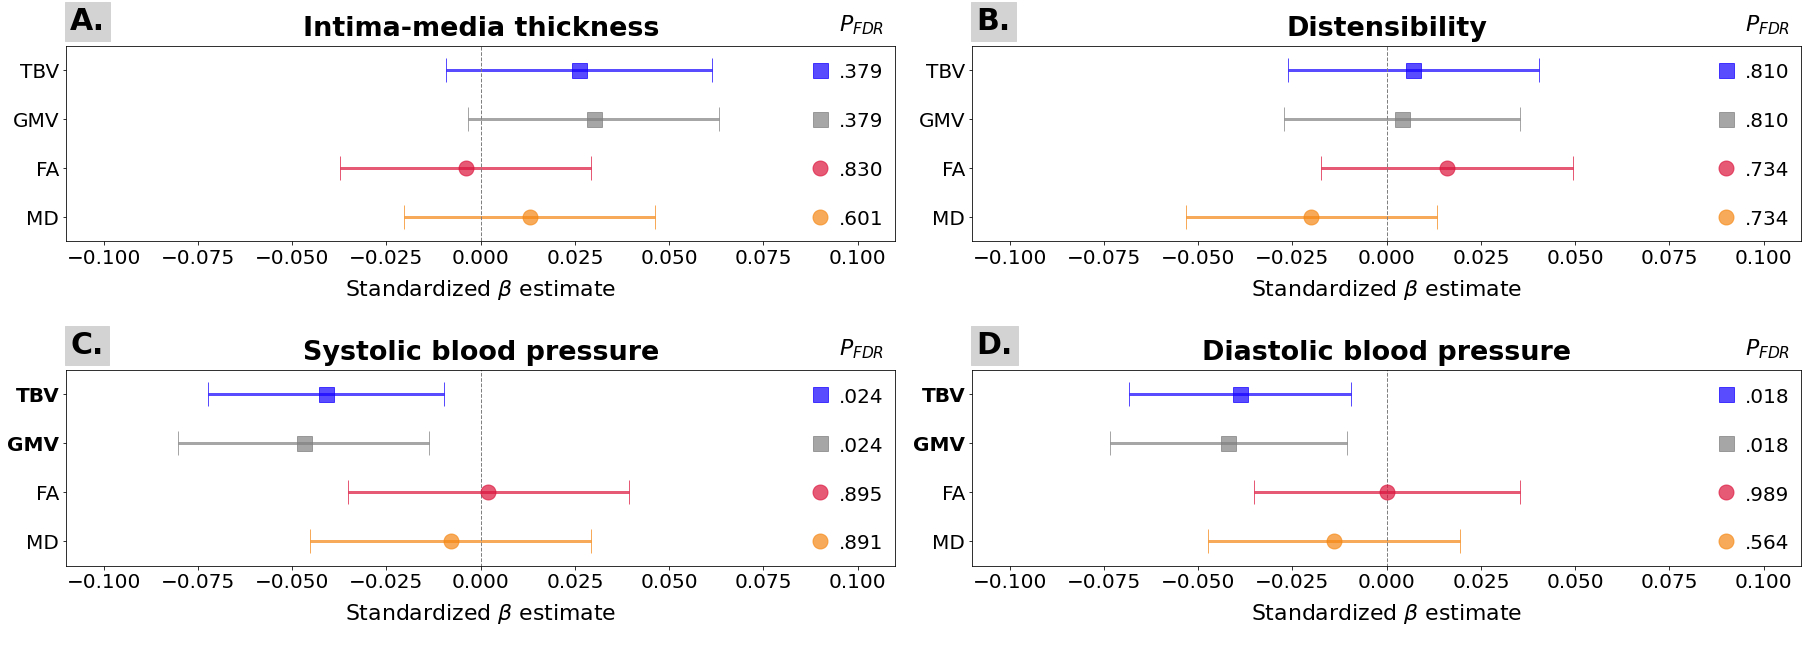

In [7]:
make_fig(title='F1'+sample) # make_fig(adj='base',title='Other-F1-base')

## Figure 2

In [9]:
dat = pd.read_csv(respath+'df.by.imp'+sample+'/Data_imp0.csv')
dat.shape

(5341, 153)

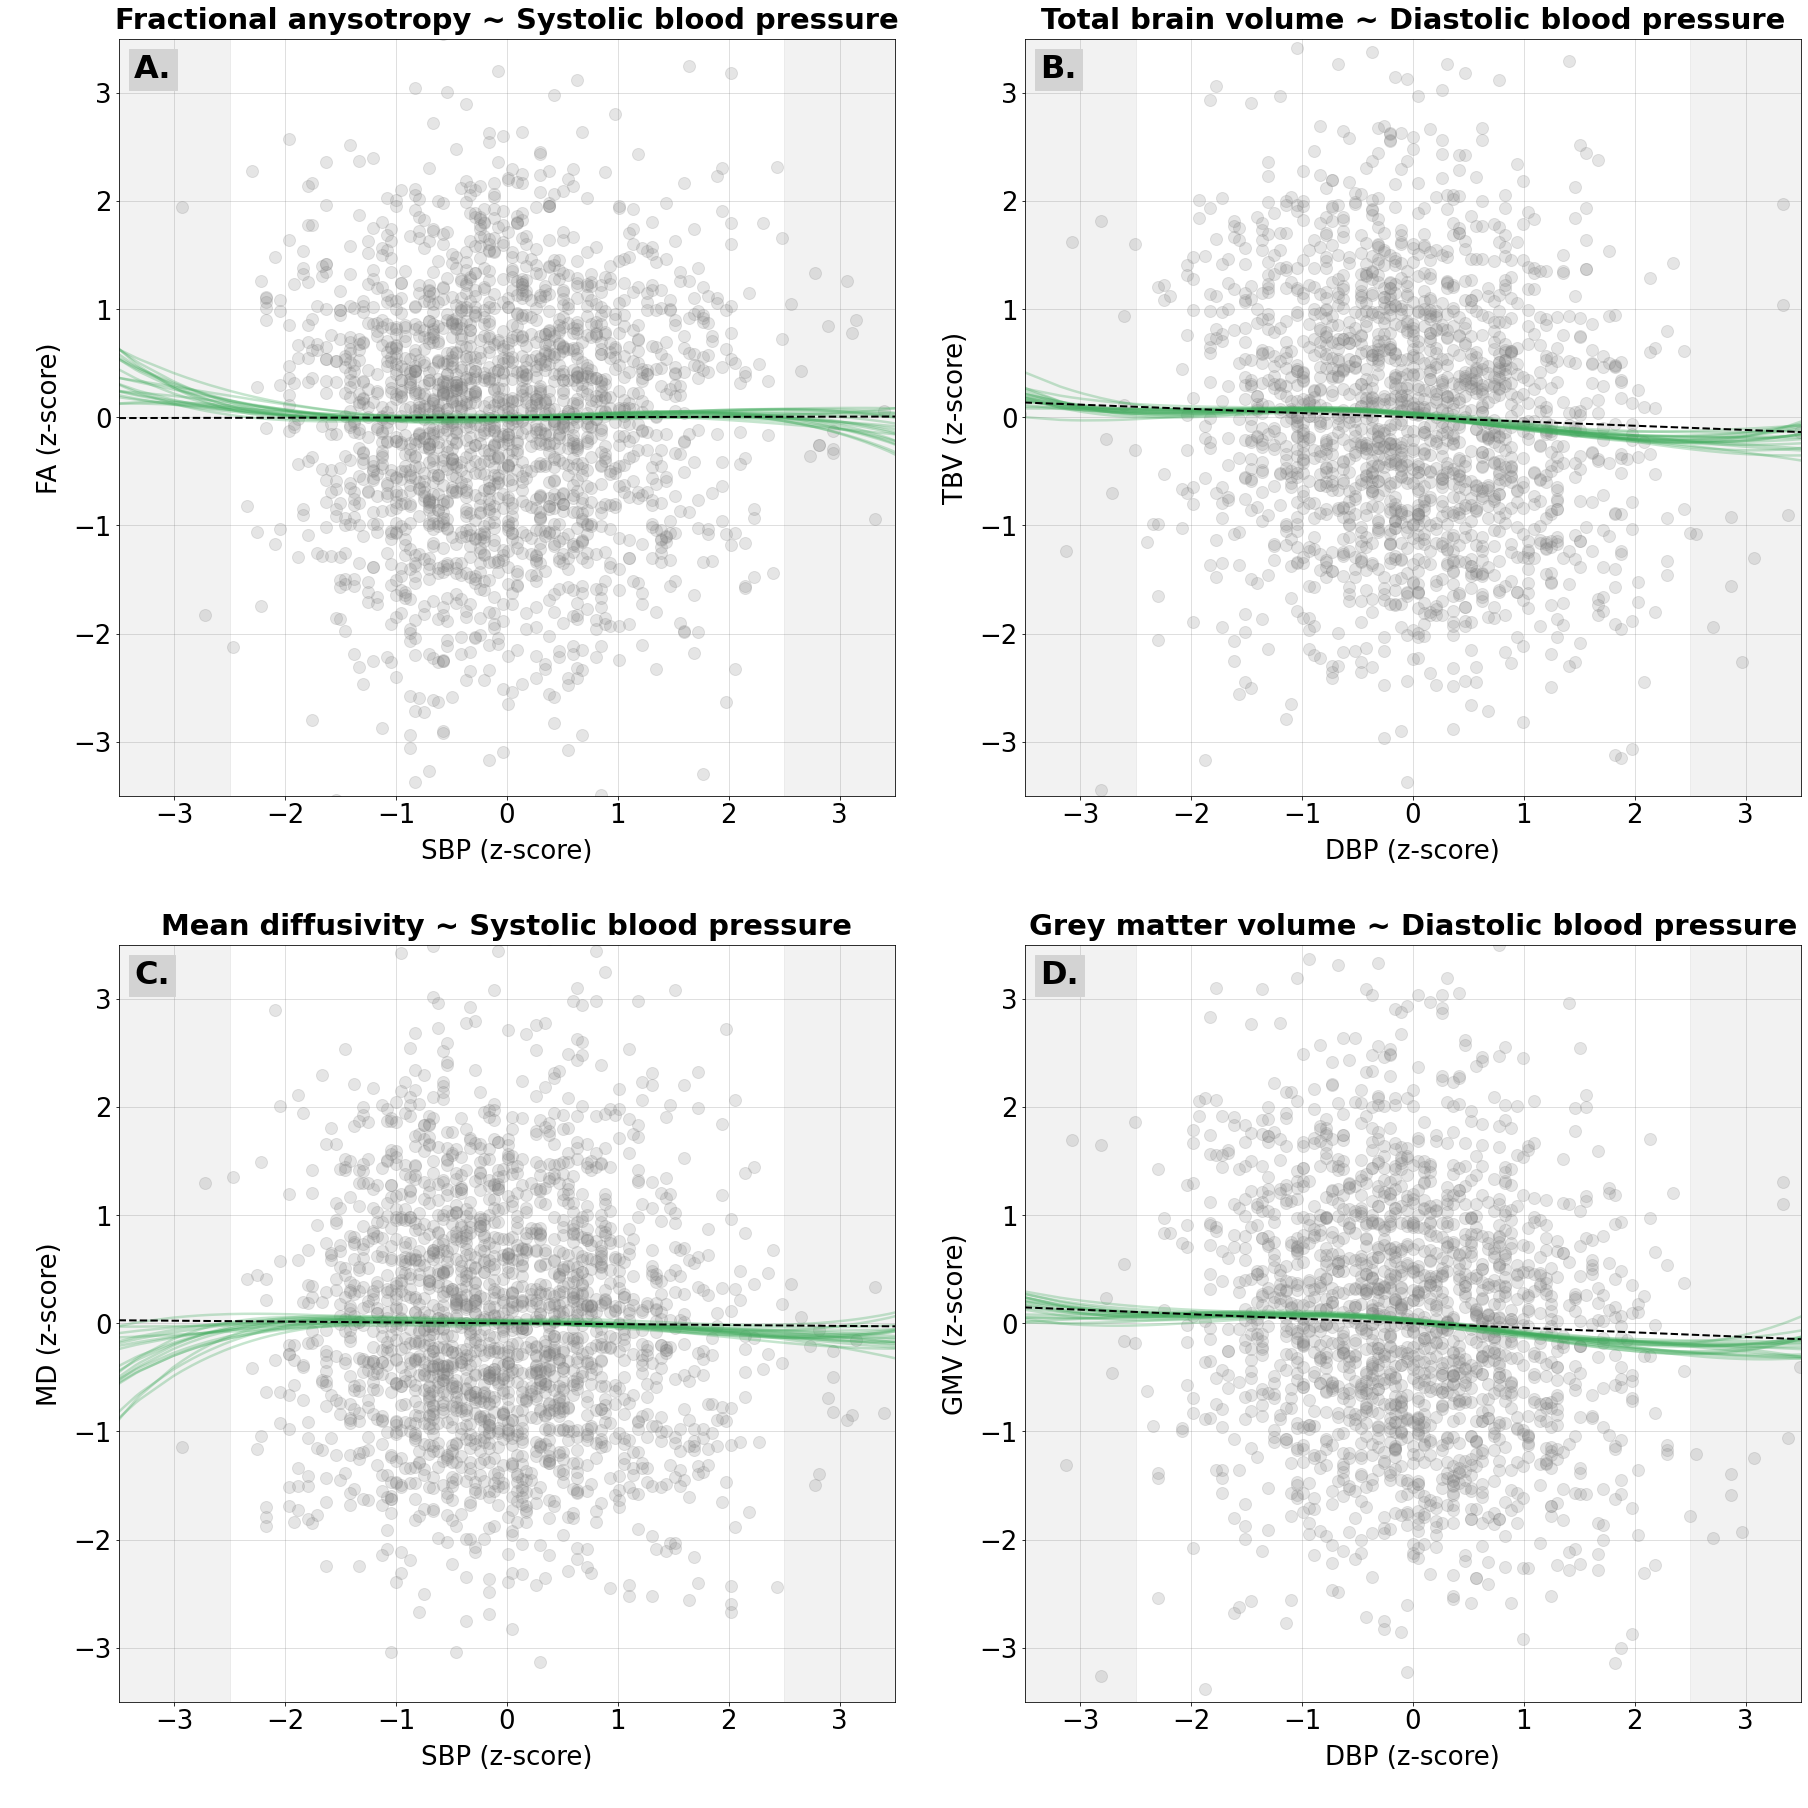

In [12]:
from scipy import interpolate

# Fit the spline
def splineit(imp, exp, outc, ax, knot_number = 2, color='#41ab5d'):
    # read in imputed dataset and sort by exposure values
    d = pd.read_csv(respath+'df.by.imp'+sample+'/Data_imp'+str(imp)+'.csv').sort_values(by=exp.lower()+'_10_z')
    x = d[exp.lower()+'_10_z']
    y = d[outc.lower()+'_13_z']
    # determine where are the knots 
    x_new = np.linspace(0, 1, knot_number+2)[1:-1] # knot_number equally spaced values from 0-1
    q_knots = np.quantile(x, x_new) # use them to define quantiles of x
    # fit the spline 
    t,c,k = interpolate.splrep(x, y, t=q_knots, s=1)
    yfit = interpolate.BSpline(t,c,k)(x) 
    # plot the spline line 
    ax.plot(x, yfit, color=color, lw=2.5, alpha=0.3)

def predY(exp, outc, ax, cutoff=4.1, col='#41ab5d', col_outcome=True, rep_yaxis=False, ms=5, f1=20, f2=18, title=''):
    # in the non-imputed set:
    x = dat[exp.lower()+'_10_z']
    y = dat[outc.lower()+'_13_z']
    # extract linear regression estimate from results table 
    outc_name = outc if outc not in ['MFA','MMD'] else outc[1:]
    res = globals()[exp].loc[globals()[exp]['outcome']==outc_name]
    inter = res['estimate'].loc['(Intercept)'].iloc[1]
    slope = res['estimate'].loc[exp.lower()+'_10_z'].iloc[1]
    
    # scatter plot 
    if col_outcome:
        c = '#82adff' if outc=='TBV' else 'grey' if outc=='GMV' else '#fcbba1' if outc=='MFA' else '#fed976' #ffeda0'
    else:
        c = 'grey'
    ax.plot(x, y, 'o', color=c, ms=ms, alpha=0.2)
    
    # nonlinear relation 
    for imp in range(1,20):
        splineit(imp, exp=exp, outc=outc, ax=ax, color=col)
    
    # regression line
    s_err = res['std.error'].loc[exp.lower()+'_10_z'].iloc[1]
    ax.axline(xy1=(0, 0), slope=slope, ls='--', lw=2, color='k') # (0,inter)
    # confidence band
    # ci = t * s_err * np.sqrt(1/n + (x2 - np.mean(x))**2 / np.sum((x - np.mean(x))**2))
    # ax.fill_between(x2, y2 + ci, y2 - ci, alpha=1, color='r') #, color="#b9cfe7", edgecolor="")
    #ax.axline(xy1=(s_err*100, 0), slope=slope, ls='-',lw=1, color='r') # (0,inter)
    #ax.axline(xy1=(-s_err*100, 0), slope=slope, ls='-',lw=1, color='r') # (0,inter)
    
    # set axis limits
    ax.set_ylim(-cutoff,cutoff)
    ax.set_xlim(-cutoff,cutoff)
    # add grid and 2.5 SD cuoffs 
    ax.grid(color = 'grey', ls = '-', lw= 0.5, alpha=0.5)
    ax.axvspan(-7,-2.5,alpha=0.1, color='grey')
    ax.axvspan(2.5, 7, alpha=0.1, color='grey')
    # adjust axis ticks 
    ax.tick_params(axis='both', which='major', labelsize=f2)
    exp_name = exp if not exp =='Dis' else 'Distensibility'
    ax.set_xlabel(exp_name+' (z-score)\n', fontsize=f2, labelpad=10)
    if rep_yaxis:
        ax.set_ylabel(f'\n{outc_name} (z-score)', fontsize=f2, labelpad=10)
    elif exp == 'IMT':
        ax.set_ylabel(f'{outc_name} (z-score)', fontsize=f2, labelpad=10, fontweight='bold')
        
    ax.set_title(title, fontsize=f1, fontweight='bold', pad=10)
    
# ==============================================================================================    
f, axs = plt.subplots(2, 2, figsize=(25, 25), constrained_layout = True)

plt.rcParams["font.family"] = "sans-serif"

f.subplots_adjust(hspace=0.2, wspace=0.2)

predY('SBP','MFA', axs[0,0],cutoff=3.5, col_outcome=False, rep_yaxis=True, ms=12, f1=29, f2=26, 
     title='Fractional anysotropy ~ Systolic blood pressure')
predY('SBP','MMD', axs[1,0],cutoff=3.5, col_outcome=False, rep_yaxis=True, ms=12, f1=29, f2=26,
      title='Mean diffusivity ~ Systolic blood pressure')
predY('DBP','TBV', axs[0,1],cutoff=3.5, col_outcome=False, rep_yaxis=True, ms=12, f1=29, f2=26,
      title='Total brain volume ~ Diastolic blood pressure')
predY('DBP','GMV', axs[1,1],cutoff=3.5, col_outcome=False, rep_yaxis=True, ms=12, f1=29, f2=26,
      title='Grey matter volume ~ Diastolic blood pressure')

for n, aa in enumerate(axs.flat):
    aa.text(0.02, 0.98, string.ascii_uppercase[n]+'.', va='top', 
            transform=aa.transAxes, size=32, weight='bold',
            bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', pad=5))

f.savefig(respath+'figures/F2'+sample+'_'+date+'.png', bbox_inches="tight", dpi=400)

## Figure 3

In [14]:
d = pd.read_csv(respath+'Data_long_base9.csv') 
print(d.shape[0]/2)
d[['sbp_10','dbp_10','AGE','TBV','GMV','MFA','MMD','TIV','WMV','CRT','SBC']].describe().round(2)

5341.0


,sbp_10,dbp_10,AGE,TBV,GMV,MFA,MMD,TIV,WMV,CRT,SBC
count,10006.00,10006.00,7136.00,3333.00,3333.00,3685.00,3685.00,3333.00,3333.00,3333.00,3333.00
mean,103.27,58.67,11.90,1214.05,750.76,0.54,0.81,1543.96,435.87,569.34,61.04
std,7.97,6.40,2.01,114.64,67.00,0.02,0.02,152.29,52.33,55.89,4.75
min,73.33,29.67,8.55,676.45,436.21,0.43,0.66,880.32,216.90,298.61,38.16
25%,97.67,54.33,9.91,1137.94,706.83,0.53,0.79,1440.76,401.02,532.11,57.96
50%,103.00,58.33,11.37,1213.58,751.83,0.54,0.81,1540.51,433.67,569.39,60.92
75%,108.33,62.67,13.76,1288.94,795.52,0.55,0.82,1640.84,469.45,607.04,64.17
max,145.67,87.67,16.68,1615.77,990.88,0.67,0.93,2317.37,645.19,753.84,80.60


In [15]:
for var in ['imt','dis','sbp','dbp']:
    d[var.upper()] = pd.cut(d[var+'_10_z'], bins=[-6,-1,1,6], 
                            labels=['Low (< -1 SD)','Intermediate','High (> 1SD)'])

def plot_long_reg(exp, outc, ax, f1=25, f2=20, o_name='',
                  leg='right', plot_yticks=True, sign=False):
    
    outc_name = o_name if len(o_name)>1 else outc
    exp_name = 'Distensibility' if exp=='DIS' else exp
    # ax.set_title(exp, fontweight='bold', fontsize=f1)
    
    labels=['Low (< -1 SD)','Intermediate','High (> 1SD)']
    colors=['royalblue','mediumseagreen','crimson']
    
    # regression lines
    # If only one plot, could be done more easily with lmplot 
    # p = sns.lmplot(x='AGE', y=outc, hue=exp, data=d, height=6, aspect=1.8, scatter=True, 
    #               markers=['o','','o'], palette=['royalblue','mediumseagreen','crimson'])
    # but lmplot is a figure level function so to be able to use subplots I use 3 regplots instead. 
    for i in range(3):
        sns.regplot(x='AGE', y=outc, data=d.loc[d[exp]==labels[i]], ax=ax, color=colors[i],
                scatter=False, label=labels[i], truncate=True) # scatter_kws={'alpha':0.1})
    
    # x axis limits to age range and y-axis limits to 10th and 90th percentiles 
    ax.set_xlim(8.5,16.5)
    a, b = d[outc].quantile([.1,.9])
    ax.set_ylim(a, b)
    ax.tick_params(axis='both', which='major', labelsize=f2)
    
    # Add age distribution
    ax2 = ax.twinx()
    sns.distplot(d['AGE'], hist=False, kde=True, ax=ax2, color='k', 
            kde_kws = {'shade': True,'linewidth': 0, 'alpha':0.1})
    ax2.set_ylim(0,3)
    ax2.get_yaxis().set_visible(False)
    
    # add grid
    ax.grid(color = 'grey', ls = '-', lw=0.5, alpha=0.5)
    
    # Add axes labels 
    ax.set_xlabel('Age (years)', labelpad=6, fontsize=f1)
    ax.set_ylabel( outc_name, labelpad=10, fontsize=f1, fontweight='bold')
    
    # Adjust volumentric values 
    if outc not in ('MFA','MMD'):
        ticks = ax.get_yticks()
        ylabels = ['{:,.0f}'.format(x) for x in ticks]
        ax.set_yticklabels(ylabels)
    
    if not plot_yticks:
        ax.tick_params(labelleft=False) # remove y tick labels  
        ax.set_ylabel('', fontsize=f2) # remove y axis label
    
    # Legend
    lgd = ax.legend(loc=leg, fontsize = f2, ncol=1, title=exp_name) # bbox_to_anchor=(1, 0.9)
    lgd.get_title().set_fontsize(f1)
    lgd.get_title().set_fontweight('bold')
    
    # Add asterix to indicate significance
    if sign: 
        ax.text(0.05, 0.85, '*', transform=ax.transAxes, fontsize=f1*2, fontweight='bold')

In [57]:
# f, axs = plt.subplot_mosaic('abcd;ABCD;EFGH;IJKL;MNOP', figsize=(10,10), 
#                             height_ratios=[0.2,1,1,1,1], sharey=True)

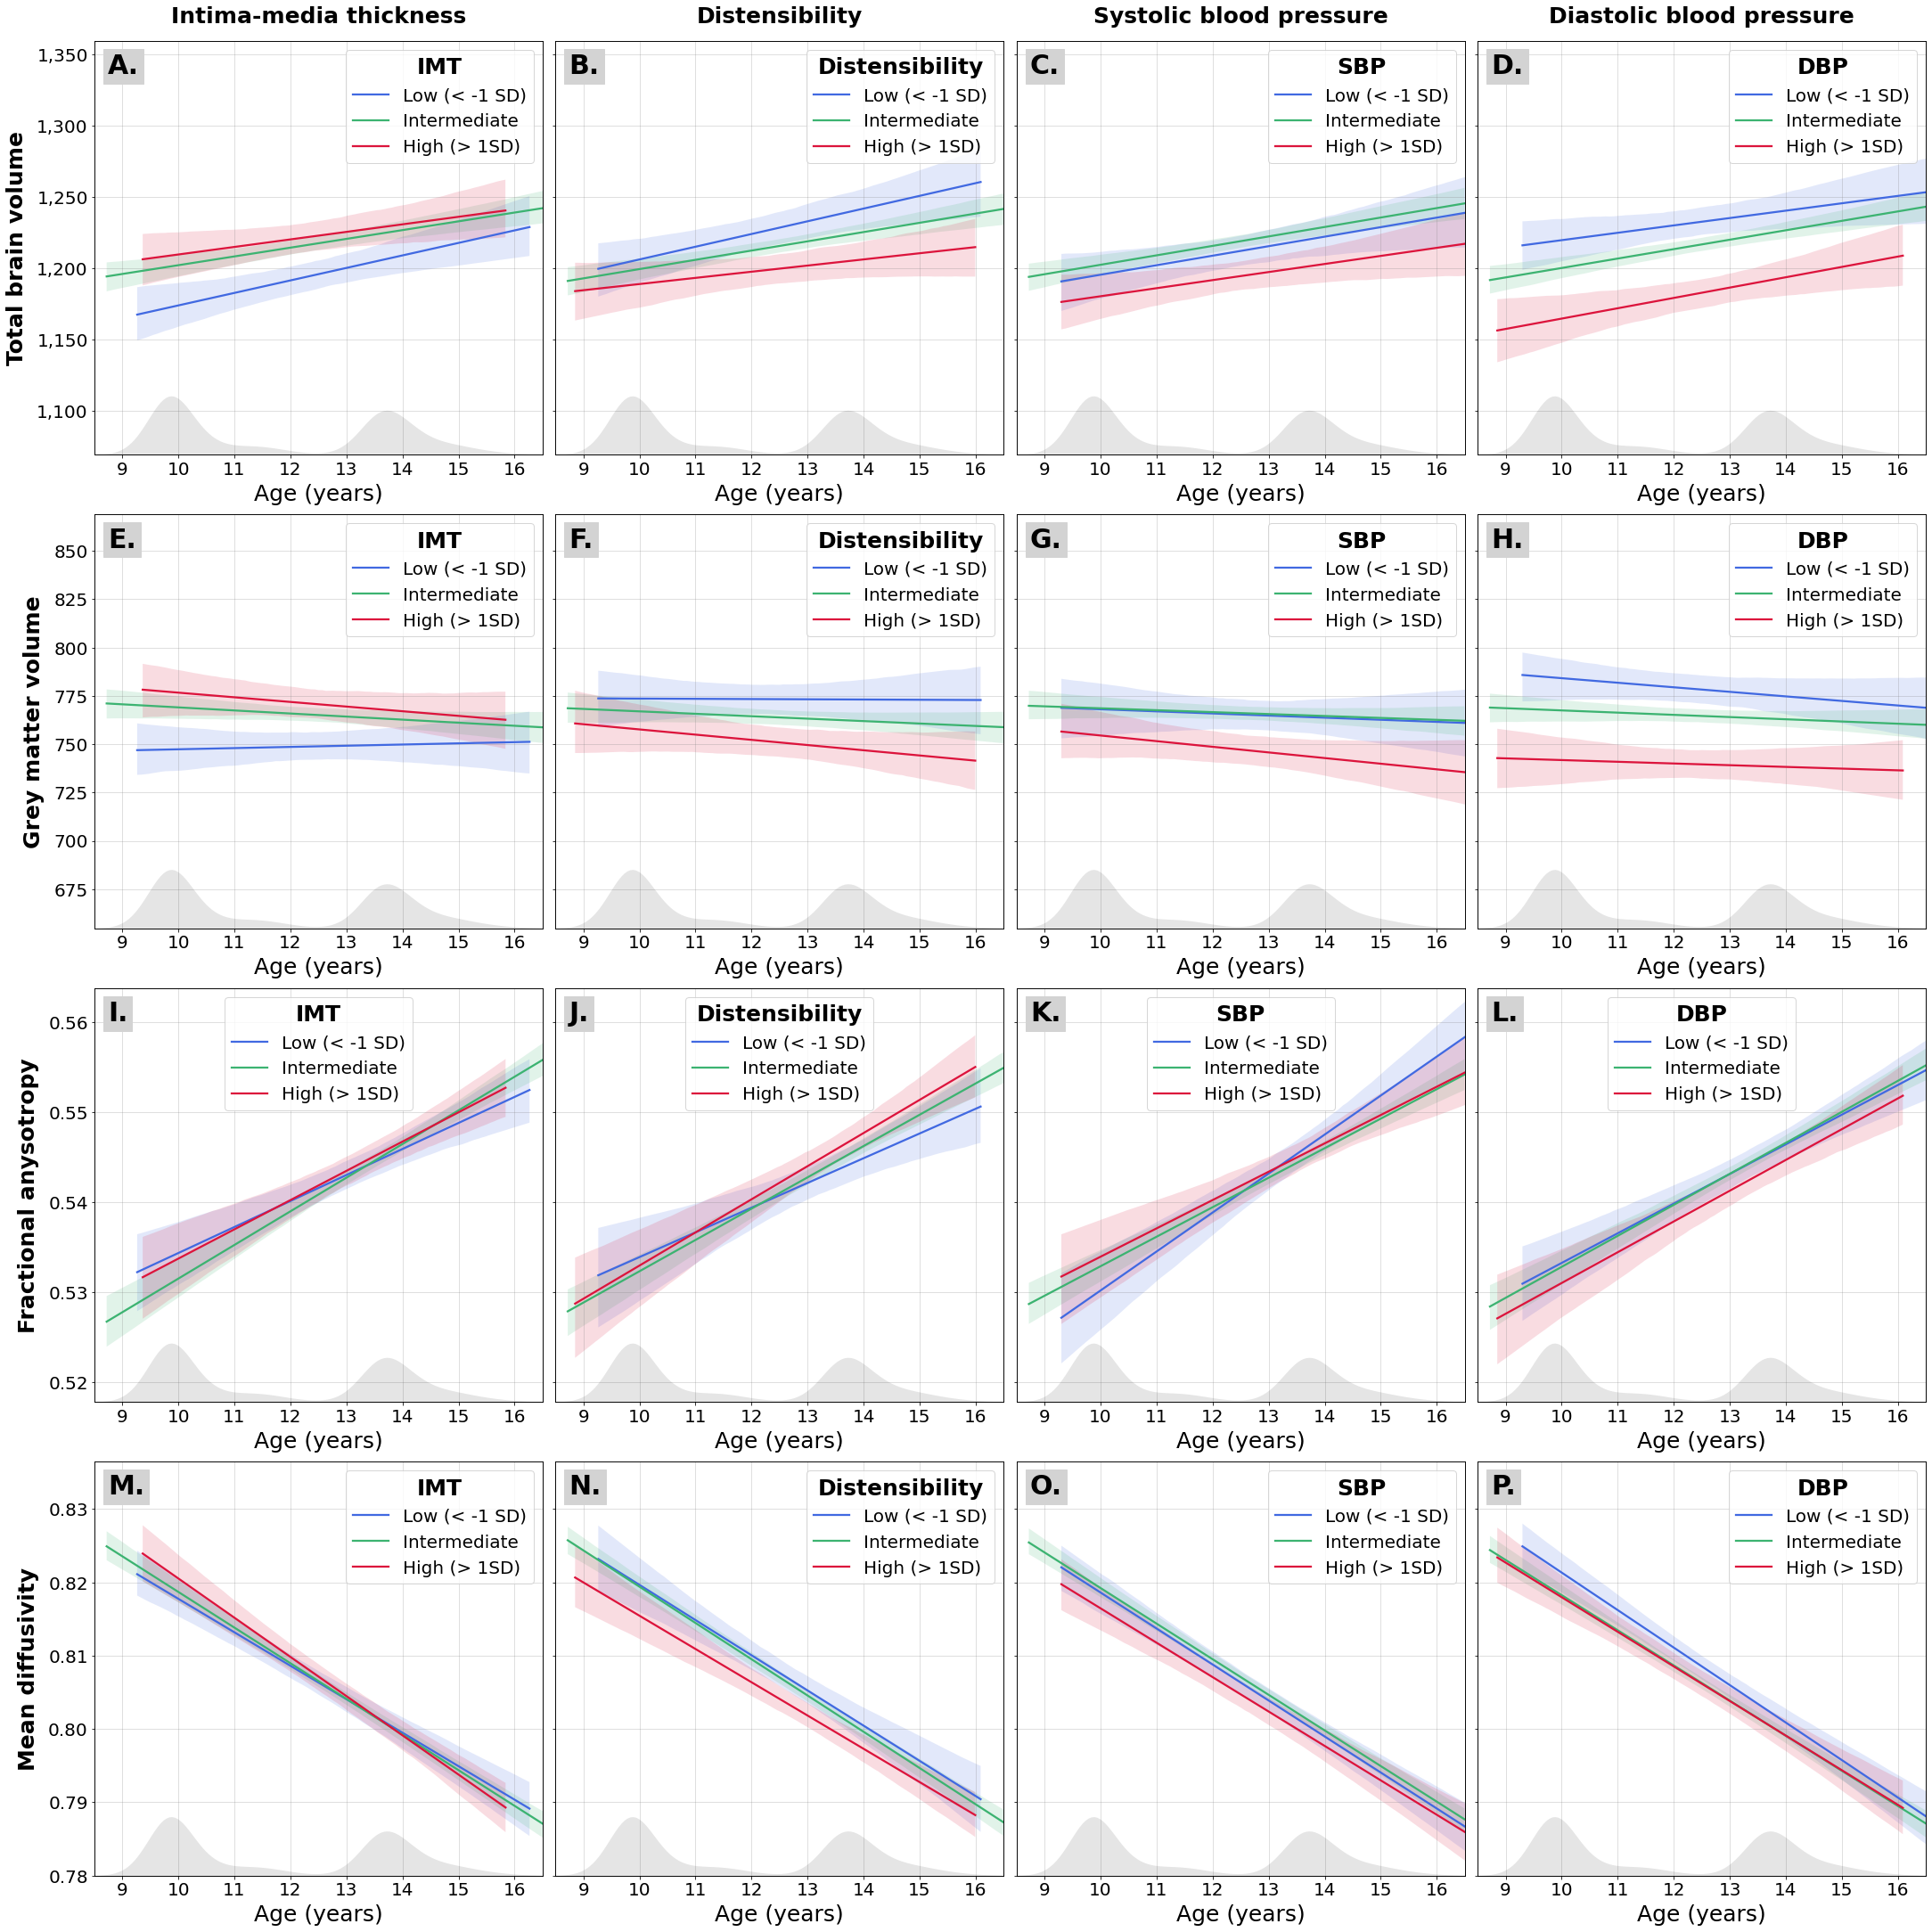

In [17]:

# ==============================================================================================    

f, axs = plt.subplots(4, 4, figsize=(30, 30),
                      constrained_layout = True)

titles = ['Intima-media thickness','Distensibility','Systolic blood pressure','Diastolic blood pressure']
ynames = ['Total brain volume','Grey matter volume','Fractional anysotropy','Mean diffusivity']

for row, out in enumerate(['TBV','GMV','MFA','MMD']):
    for col, exp in enumerate(['IMT','DIS','SBP','DBP']):
        sign = False # True if [exp,out] in [['SBP','TBV'],['SBP','GMV'],['IMT','MMD']] else False
        tck = True if col == 0 else False
        yname = ynames[row] if col==0 else ''
        legpos = 'upper center' if out=='MFA' else 'upper right'
        plot_long_reg(exp, out, ax=axs[row,col], plot_yticks=tck, sign=sign, leg=legpos, o_name=yname)
        if row==0:
            axs[row,col].set_title(titles[col], fontsize=25, fontweight='bold',pad=20)

for n, aa in enumerate(axs.flat):
    aa.text(0.03, 0.97, string.ascii_uppercase[n]+'.', va='top', 
            transform=aa.transAxes, size=30, weight='bold',
            bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', pad=5))

f.savefig(respath+'figures/F3'+sample+'_'+date+'.png', bbox_inches="tight", dpi=400)

# Supplementary Figures

In [ ]:
# SF2 ===================================================================
f, axs = plt.subplots(4, 4, figsize=(30, 30.5), constrained_layout = True)

plt.rcParams["font.family"] = "sans-serif"

f.subplots_adjust(hspace=0.3, wspace=0.15)

for row, out in enumerate(['TBV','GMV','MFA','MMD']):
    for col, exp in enumerate(['IMT','Dis','SBP','DBP']):
        predY(exp, out, axs[row,col])

for n, aa in enumerate(axs.flat):
    aa.text(-0.1, 1.01, string.ascii_uppercase[n]+'.', transform=aa.transAxes, size=22, weight='bold')

f.savefig(respath+'figures/SF2-all-nonlin'+sample+'_'+date+'.png', bbox_inches="tight", dpi=400)

In [ ]:
# SF3 ===================================================================
make_fig(xl=(-0.14, 0.15), title='SF3-sex-strata'+sample)

In [ ]:
# SF4 ===================================================================
make_fig(fig_size=(25, 12), wspace=0.3, hspace=0.4, lett_pos=-0.19, anal='subc_vol', 
         title='SF4-subc-vol'+sample)

In [ ]:
# SF5-6 ===================================================================
make_fig(fig_size=(25, 12), wspace=0.6, hspace=0.4, lett_pos=-0.55, anal='tract_FA', title='SF5-tractsFA'+sample)
make_fig(fig_size=(25, 12), wspace=0.6, hspace=0.4, lett_pos=-0.55, anal='tract_MD', title='SF6-tractsMD'+sample)

In [ ]:
# SF7 ===================================================================
f, axs = plt.subplots(4, 4, figsize=(30, 30), constrained_layout = True)

for row, out in enumerate(['TBV','GMV','MFA','MMD']):
    for col, exp in enumerate(['IMT','DIS','SBP','DBP']):
        sign = True if [exp,out] in [['SBP','TBV'],['SBP','GMV'],['IMT','MMD']] else False
        tck = True if col == 0 else False
        plot_long_reg(exp, out, ax=axs[row,col], plot_yticks=tck, sign=sign)

for n, aa in enumerate(axs.flat):
    aa.text(0.01, 1.02, string.ascii_uppercase[n]+'.', transform=aa.transAxes, size=28, weight='bold')

#f.savefig(respath+'figures/SF7-all-long'+sample+'_'+date+'.png', bbox_inches="tight", dpi=400)

In [ ]:
f, axs = plt.subplots(4, 4, figsize=(30, 30), constrained_layout = True)

for row, out in enumerate(['TIV','WMV','CRT','SBC']):
    for col, exp in enumerate(['IMT','DIS','SBP','DBP']):
        sign = True if [exp,out] in [['DIS','TIV'],['SBP','TIV'],['DBP','TIV'],['SBP','CRT']] else False
        tck = True if col == 0 else False
        plot_long_reg(exp, out, ax=axs[row,col], plot_yticks=tck, sign=sign)


# POSTER

In [35]:
def extract_estimates(exp='SBP', full_model=1):
    df = globals()[exp+'_orig']

    est_TBV = SBP_orig.loc[SBP_orig.model.str.contains('TBV', na=False)].loc['sbp_10'].estimate[1]

    est_GMV = SBP_orig.loc[SBP_orig.model.str.contains('GMV', na=False)].loc['sbp_10'].estimate[1]
    est_WMV = SBP_other.loc[SBP_other.model.str.contains('WMV', na=False)].loc['sbp_10_z'].estimate[1]

    est_COR = SBP_other.loc[SBP_other.model.str.contains('COR', na=False)].loc['sbp_10_z'].estimate[1]
    est_SUB = SBP_other.loc[SBP_other.model.str.contains('SUB', na=False)].loc['sbp_10_z'].estimate[1]



est_TBV, est_GMV, est_WMV, est_COR, est_SUB, 

(-0.497, -0.33, -1.492, -2.15, -0.097)

In [33]:
SBP_other

,model,estimate,std.error,statistic,df,p.value,FDR,sign_raw,sign_fdr,lci,...,rsq_adj,m,riv,lambda,fmi,ubar,b,t,dfcom,outcome
term,,,,,,,,,,,,,,,,,,,,,
(Intercept),COR - SBP base model,504.606,20.329,24.822,506.694,0.000,0.000,*,*,464.666,...,0.146,20.0,0.223,0.182,0.185,338.040,71.655,413.278,5336.0,COR
sbp_10_z,COR - SBP base model,-2.304,0.737,-3.125,172.147,0.002,0.012,*,*,-3.760,...,NaN,20.0,0.480,0.324,0.332,0.367,0.168,0.544,5336.0,COR
sexgirl,COR - SBP base model,-32.906,1.543,-21.319,103.124,0.000,0.000,*,*,-35.967,...,NaN,20.0,0.730,0.422,0.433,1.377,0.957,2.382,5336.0,COR
age_mri_13,COR - SBP base model,-3.290,1.347,-2.443,85.514,0.017,0.034,*,*,-5.967,...,NaN,20.0,0.867,0.464,0.476,0.972,0.802,1.813,5336.0,COR
height_10,COR - SBP base model,0.873,0.115,7.611,125.518,0.000,0.000,*,*,0.646,...,NaN,20.0,0.617,0.382,0.391,0.008,0.005,0.013,5336.0,COR
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
(Intercept),COR - SBP full model,499.116,21.075,23.683,376.858,0.000,0.000,*,*,457.677,...,0.171,20.0,0.273,0.214,0.218,349.009,90.604,444.143,5332.0,COR
sbp_10_z,COR - SBP full model,-2.150,0.749,-2.869,218.840,0.005,0.015,*,*,-3.627,...,NaN,20.0,0.401,0.286,0.292,0.401,0.153,0.562,5332.0,COR
sexgirl,COR - SBP full model,-32.998,1.531,-21.547,100.180,0.000,0.000,*,*,-36.037,...,NaN,20.0,0.749,0.428,0.439,1.341,0.957,2.345,5332.0,COR


In [ ]:
import plotly.graph_objects as go

def sankey(data, size, col):
    
    sank = go.Sankey(link = data, arrangement='snap',
                     
                     node =  dict(pad = 15, thickness = 40,
                                  line = dict(color = "black", width = 0.05),
                                  label = ['','Insufficient prenatal data','Insufficient postnatal data',
                                           'Twins','Siblings',''],
                                  color = ['darkgrey']*5+[col]))
    
    layout = go.Layout(autosize=False, width=400, height=size/20,
                       margin=go.layout.Margin(l=10,r=10,b=10,t=10,pad=2),
                       font_family="Arial",font_color='black',font_size=25)
    
    fig = go.Figure(sank, layout=layout)
    return(fig)


genr = dict(source = [9778]*5, target = list(range(1,6)), value = [2905, 2248, 99, 258, 4268])


# Other Figures

In [ ]:
db = pd.read_csv('/Users/Serena/Desktop/arterial_brain/DATA/Data_dirty_brain.csv')
cb = pd.read_csv('/Users/Serena/Desktop/arterial_brain/DATA/Data.csv')

db.shape

In [ ]:
db['tbv_13'].describe()['count'] - cb['tbv_13'].describe()['count']

In [ ]:
# all(db['IDC'] == cb['IDC'])
sel = pd.concat([db['IDC'],db['tbv_13'],cb['tbv_13'], 
                 db['mri_braces_13'],db['mri_inc_find_13']], axis=1, keys=['IDC','dirty','clean','braces','inc_find'])
print(sel.shape[0])
sel = sel[~sel['dirty'].isna()]
print(sel.shape[0])
sel = sel[sel['clean'].isna()]
print(sel.shape[0])

In [ ]:
excr = ['mri_consent_13',
 'mri_braces_13',
 'mri_inc_find_13',
 't1_scantype_13',
 't1_qc_13',
 'dti_scantype_13',
 'dti_qc_13']

# db[excr[0:4]].value_counts()

In [ ]:
imps = pd.DataFrame()
for i in range(20):
    ds = pd.read_csv('/Users/Serena/Desktop/arterial_brain/results/df_by_imp/Data_imp'+str(i+1)+'.csv')
    imps = imp.append(ds['tbv_13'])

In [ ]:
imp = pd.concat([ds['IDC'],imps.mean(),imps.min(),imps.max()], axis=1).rename(columns=
                                                                              {'IDC':'IDC',0:'mean',1:'min',2:'max'})

In [ ]:
ov = imp[imp['IDC'].isin(sel['IDC'])]
d = ov.merge(sel[['IDC','dirty','braces','inc_find']])

In [ ]:
d[['mean','dirty']].corr().round(2)

In [ ]:
d['diff'] = d['dirty'] - d['mean']

In [ ]:
d['inc_find'].value_counts() # braces . exclude 

In [ ]:

sns.regplot(d['mean'], d['dirty'], 'o')

In [ ]:
plt.figure(figsize=(30,10))

d = d.sort_values('diff').reset_index(drop=True)

# col = {'braces':'crimson', 'no':'red'}
# col = ['crimson' if x=='no' else 'brown' for x in d['braces']]

plt.scatter(d['diff'], d['dirty'], c='crimson')
plt.plot(d['diff'], d['mean'], 'o', color='mediumblue')
plt.fill_between(d['diff'], d['min'], d['max'], color='mediumblue', alpha=0.1)

# plt.xlim(-10,1200)

In [ ]:
d = d.sort_values('dirty').reset_index(drop=True)

plt.figure(figsize=(30,10))

plt.plot(d.index, d['dirty'], 'o', color='red')
plt.plot(d.index, d['mean'], 'o', color='blue')
plt.fill_between(d.index, d['min'], d['max'], color='blue', alpha=0.1)

plt.xlim(-10,1200)

In [ ]:
d = d.sort_values('mean').reset_index(drop=True)

plt.figure(figsize=(30,10))

plt.plot(d.index, d['dirty'], 'o', color='red')
plt.plot(d.index, d['mean'], 'o', color='blue')
plt.fill_between(d.index, d['min'], d['max'], color='blue', alpha=0.1)

plt.xlim(-10,1200)

In [ ]:
db['mri_consent_13'].value_counts()

In [ ]:
db['mri_consent_13'].describe()

In [ ]:
rmvd = db[db['mri_consent_13'] !='yes']

rmvd['tbv_13'].describe()
# 
#                         data[,paste0('mri_braces',age)]!='no' | 
#                         data[,paste0('mri_inc_find',age)]!='include' | 
#                         is.na(data[,paste0(scan,'scantype',age)]) | 
#                         data[,paste0(scan,'qc',age)]!='usable',

In [ ]:
ld = pd.DataFrame()
for imp in range(0,20):
    d = pd.read_csv(respath+'df_by_imp/Data_imp'+str(imp)+'.csv').drop('Unnamed: 0', axis=1) # read in imputed dataset
    d['.imp'] = imp
    ld = pd.concat([ld, d], axis=0)

In [ ]:
dat[['accumbens','amygdala','caudate','hippocampus','pallidum','putamen','thalamus']].describe()

In [ ]:
for imp in range(1,20):
    globals()['dat'+str(imp)] = pd.read_csv(respath+'df_by_imp2/Data_imp'+str(imp)+'.csv') # read in imputed dataset
    # globals()['dato'+str(imp)] = pd.read_csv(respath+'df_by_imp3/Data_imp'+str(imp)+'.csv') # read in imputed dataset
    
# imp 3 is with passive imputation (red)
# imp 2 is fully specified (green)

In [ ]:
# imputation quality 
dat = pd.read_csv(respath+'df_by_imp2/Data_imp0.csv')
    
def obs_vs_imp(var, ax, var_name='', print_yaxis=False, ntk_xaxis=7, rot_xaxis=False, f1=25, f2=20):
    
    # plot distribution in each imputed dataset
    for imp in range(1,20):
        # d = pd.read_csv(respath+'df_by_imp2/Data_imp'+str(imp)+'.csv') # read in imputed dataset
        # d['age_mri_13'] = d['age_13'] # FIX NAMING ISSUE
        globals()['dat'+str(imp)][var].plot(kind='density', ax=ax, color='crimson', lw=0.5, alpha=0.5)
        # globals()['dato'+str(imp)][var].plot(kind='density', ax=ax, color='green', lw=0.5, alpha=0.5)
    
    # plot distribution obverved values
    # dat['age_mri_13'] = dat['age_13'] # FIX NAMING ISSUE
    dat[var].plot(kind='density', ax=ax, color='#3182bd', lw=4.5, alpha=0.5)
    
    # Annontate missing percent 
    pm = str(round(dat[var].isnull().sum()/len(dat)*100,1))+' %'
    ax.text(0.9, 0.9, pm, fontsize=f1, fontweight='bold', color='crimson',transform=ax.transAxes, va='top', ha='right')
    
    ax.set_xlim(min(dat[var]), max(dat[var]))
    
    # Adjust axis ticks 
    ax.set_yticklabels([])
    
    ax.xaxis.set_major_locator(plt.MaxNLocator(ntk_xaxis))
    
    xticks = ax.get_xticks()
    if max(xticks)>10000:
        xlabels = ['{:,.0f}'.format(x/1000)+'K' if x >= 10000 else '{:.0f}'.format(x) for x in xticks]
    elif max(xticks) <2:
        xlabels = ['{:.2f}'.format(x) for x in xticks]
    else:
        xlabels = ['{:.0f}'.format(x) for x in xticks] 
    
    r = 20 if (rot_xaxis) & (max(dat[var]) >= 10000) else 0
    ha = 'right' if (rot_xaxis) & (max(dat[var]) >= 10000) else 'center'
            
    ax.set_xticklabels(xlabels, fontsize=f2, rotation=r, ha=ha, va='top')
    
    ax.set_xlabel('')
    if print_yaxis:
        ax.set_ylabel('Density', fontsize=f2, labelpad=5)
    else:
        ax.set_ylabel('')
    
    ax.set_title(var_name, fontsize=f1, fontweight='bold', pad=10)

In [ ]:
f, axs = plt.subplots(3, 4, figsize=(30, 20), constrained_layout = True)

expos = {'imt_9':'IMT (10y)','dis_9':'Distensibility (10y)','sbp_9':'SBP (10y)','dbp_9':'DBP (10y)'}
outcs = {'tbv':'TBV', 'gmv':'GMV', 'mfa':'Global FA', 'mmd':'Global MD'}

for col in range(4):
    py = True if col==0 else False
    obs_vs_imp(list(expos.keys())[col], axs[0,col], list(expos.values())[col], print_yaxis=py)
    obs_vs_imp(list(outcs.keys())[col]+'_9', axs[1,col], list(outcs.values())[col]+' (10y)', print_yaxis=py)
    obs_vs_imp(list(outcs.keys())[col]+'_13',axs[2,col], list(outcs.values())[col]+' (13y)', print_yaxis=py)

In [ ]:
rows, cols = 4, 2
f, axs = plt.subplots(rows, cols, figsize=(10*cols, 5*rows), constrained_layout = True)

outcs = {'tbv':'TBV', 'gmv':'GMV', 'mfa':'Global FA', 'mmd':'Global MD'}

for r in range(rows):
    py = True if col==0 else False
    obs_vs_imp(list(outcs.keys())[r]+'_9', axs[r,0], list(outcs.values())[r]+' (10y)', print_yaxis=py)
    obs_vs_imp(list(outcs.keys())[r]+'_13',axs[r,1], list(outcs.values())[r]+' (13y)', print_yaxis=py)

f.subplots_adjust(hspace=0.5) 

In [ ]:
f, axs = plt.subplots(6, 7, figsize=(30, 30), constrained_layout = True)

scv = ['accumbens','amygdala','caudate','hippocampus','pallidum','putamen','thalamus']
wmt = {'cgc':'Cingulate gyrus','cst':'Cortico-spinal tract','unc':'Uncinate fasciculus',
       'ilf':'Inferior long. fasc.','slf':'Superior long. fasc.',
       'fma':'Major forceps','fmi':'Minor forceps'}

for col in range(7):
    py = True if col==0 else False
    obs_vs_imp(scv[col]+'_9', axs[0,col], scv[col].capitalize()+' (10y)', print_yaxis=py, ntk_xaxis=5)
    obs_vs_imp(scv[col]+'_13', axs[1,col], scv[col].capitalize()+' (13y)', print_yaxis=py, ntk_xaxis=5)
    obs_vs_imp(list(wmt.keys())[col]+'_FA_9', axs[2,col], list(wmt.values())[col]+'\n(FA; 10y)', print_yaxis=py,ntk_xaxis=6)
    obs_vs_imp(list(wmt.keys())[col]+'_FA_13', axs[3,col], list(wmt.values())[col]+'\n(FA; 13y)', print_yaxis=py,ntk_xaxis=6)
    obs_vs_imp(list(wmt.keys())[col]+'_MD_9', axs[4,col], list(wmt.values())[col]+'\n(MD; 10y)', print_yaxis=py,ntk_xaxis=6)
    obs_vs_imp(list(wmt.keys())[col]+'_MD_13', axs[5,col], list(wmt.values())[col]+'\n(MD; 13y)', print_yaxis=py,ntk_xaxis=6)

In [ ]:
f, axs = plt.subplots(3, 7, figsize=(30, 15), constrained_layout = True)

scv = ['accumbens','amygdala','caudate','hippocampus','pallidum','putamen','thalamus']
wmt = {'cgc':'Cingulate gyrus','cst':'Cortico-spinal tract','unc':'Uncinate fasciculus',
       'ilf':'Inferior long. fasc.','slf':'Superior long. fasc.',
       'fma':'Major forceps','fmi':'Minor forceps'}

for col in range(7):
    py = True if col==0 else False
    obs_vs_imp(scv[col], axs[0,col], scv[col].capitalize(), print_yaxis=py, ntk_xaxis=5)
    obs_vs_imp(list(wmt.keys())[col]+'_FA', axs[1,col], list(wmt.values())[col]+'\n(FA)', print_yaxis=py,ntk_xaxis=6)
    obs_vs_imp(list(wmt.keys())[col]+'_MD', axs[2,col], list(wmt.values())[col]+'\n(MD)', print_yaxis=py,ntk_xaxis=6)

In [ ]:
other = {'age_mri':'Age at visit','tiv':'Total intracranial vol.','cortex':'Cortical volume',
           'subcort':'Subcortical volume','wmv':'White matter volume', 
         'csf':'CSF','bstem':'Brain Stem',
         'crbellum_cort':'Cerebellar cortex','crbellum_wmv':'Cerebellar white matter',
         'mean_thick':'Mean thickness'}

f, axs = plt.subplots(2, 4, figsize=(30, 12), constrained_layout = True)

for col in range(4):
    py = True if col==0 else False
    obs_vs_imp(list(other.keys())[col]+'_9', axs[0,col], list(other.values())[col]+' (10y)', print_yaxis=py,ntk_xaxis=6)
    obs_vs_imp(list(other.keys())[col]+'_13',axs[1,col], list(other.values())[col]+' (13y)', print_yaxis=py,ntk_xaxis=6)

In [ ]:
other = {'age_mri':'Age at visit','tiv':'Total intracranial vol.','cortex':'Cortical volume',
           'subcort':'Subcortical volume','wmv':'White matter volume'}

f, axs = plt.subplots(2, 5, figsize=(30, 12), constrained_layout = True)

for col in range(5):
    py = True if col==0 else False
    obs_vs_imp(list(other.keys())[col]+'_9', axs[0,col], list(other.values())[col]+' (10y)', print_yaxis=py,ntk_xaxis=6)
    obs_vs_imp(list(other.keys())[col]+'_13',axs[1,col], list(other.values())[col]+' (13y)', print_yaxis=py,ntk_xaxis=6)

In [ ]:
oth = ['height_6','bmi_6_z','m_bmi_prepregn','gest_age_birth','sbp_6','parity',
       'height_9','bmi_9_z','m_bmi_6','gest_weight','dbp_6','age_9']

f, axs = plt.subplots(2, 6, figsize=(30, 6*2), constrained_layout = True)

for var in range(len(oth)):
    py = False
    r = 0 if var < 6 else 1
    c = var if var < 6 else var-7
    obs_vs_imp(oth[var], axs[r,c], oth[var], print_yaxis=py, ntk_xaxis=8)


In [ ]:
# maternal age and sex were fully observed 
# excl categorical: ethnicity, 'm_educ_pregn','m_educ_3','m_educ_6'
oth = ['height_6','bmi_6_z','m_bmi_prepregn','gest_age_birth','sbp_6','parity','age_9',
       'height_9','bmi_9_z','m_bmi_6','gest_weight','dbp_6','income_6']

f, axs = plt.subplots(2, 7, figsize=(30, 6*2), constrained_layout = True)

for var in range(len(oth)):
    py = False
    r = 0 if var < 7 else 1
    c = var if var < 7 else var-7
    obs_vs_imp(oth[var], axs[r,c], oth[var], print_yaxis=py, ntk_xaxis=8)

axs[1,6].axis('off')

In [ ]:
og = pd.read_csv(respath+'../DATA/Data.csv').drop('Unnamed: 0', axis=1) # This is the clean version !!

mri = og[~og['tbv_13'].isnull()]
dti = og[~og['mfa_13'].isnull()]

print(len(og), len(mri),len(dti))

In [ ]:
# ['mri_consent_13','mri_braces_13','mri_inc_find_13','t1_scantype_13','t1_qc_13','dti_scantype_13','dti_qc_13',
#  'mri_consent_9', 'mri_braces_9', 'mri_inc_find_9', 't1_scantype_9', 't1_qc_9', 'dti_scantype_9', 'dti_qc_9']

for v in ['mri_consent_13','mri_braces_13','mri_inc_find_13','t1_scantype_13','t1_qc_13']:
    print(mri[v].value_counts(dropna=False))

In [ ]:
# ========================================================================================================
make_fig(xl=(-0.14, 0.15), title='Sex-stratified models')
make_fig(xl=(-0.14, 0.15), adj='full', title='Sex-stratified models, fully adjusted')
# ========================================================================================================
make_fig(fig_size=(25, 12), wspace=0.3, lett_pos=-0.19, anal='subc_vol', title='Subcortical brain volumes')
make_fig(fig_size=(25, 12), wspace=0.3, lett_pos=-0.19, anal='subc_vol', adj='full', 
         title='Subcortical brain volumes, fully adjusted')
# ========================================================================================================
make_fig(fig_size=(25, 12), wspace=0.6, lett_pos=-0.55, anal='tract_FA', title='White matter tracts (FA)')
make_fig(fig_size=(25, 12), wspace=0.6, lett_pos=-0.55, anal='tract_FA', adj='full',
         title='White matter tracts (FA), fully adjusted')
# ========================================================================================================
make_fig(fig_size=(25, 12), wspace=0.6, lett_pos=-0.55, anal='tract_MD', title='White matter tracts (MD)')
make_fig(fig_size=(25, 12), wspace=0.6, lett_pos=-0.55, anal='tract_MD', adj='full',
         title='White matter tracts (MD), fully adjusted')
# ========================================================================================================
make_fig(xl=(-0.14, 0.15), title='Outcomes imputed', anal='fullsamp')
make_fig(xl=(-0.14, 0.15), adj='full', anal='fullsamp', title='Outcomes imputed, fully adjusted')


In [ ]:
def p(model, ax, title=None, xlims=(-0.13, 0.13), fdr_pos=0.09, adj=False, full=False, age=13):
    title = model if title is None else title
    md1 = md2 = pd.DataFrame(columns=IMT.columns) # all columns are the same 
    modelname = model+'_full' if full else model
    modelname = model+'_brain9' if age==9 else model
    mod = globals()[modelname]

    lbls = ['TBV', 'GMV', 'FA', 'MD']
    colors=['#1300FF', 'grey','crimson', '#F58713']
    markers = ['s','s','o','o']

    for outc in lbls:
        df1 = mod.loc[mod['outcome']==outc].loc[model.lower()+'_9_z'].iloc[0]
        df2 = mod.loc[mod['outcome']==outc].loc[model.lower()+'_9_z'].iloc[1]
        md1 = pd.concat([md1.T, df1], axis=1).T
        md2 = pd.concat([md2.T, df2], axis=1).T
    
    alph = 0.7 if adj else 1.1

    for n in range(len(md1)): # md.index for y
        ax.errorbar([md1['estimate'][n]], [lbls[n]], xerr = [md1['std.error'][n]*1.96], color = colors[n],
                    label = '$P_{FDR}=$%0.3f'%round(md1.FDR[n],2), fmt = markers[n], ms=mars, elinewidth=elw, 
                    capsize=caps, alpha=alph-0.4)
        ax.errorbar(fdr_pos, n, color = colors[n], fmt = markers[n], ms=mars, alpha=alph-0.4)
        ax.text(fdr_pos+0.01, n+0.05, ('%.3f'%round(md1.FDR[n],3))[1:], fontsize=15, va='center', ha='center')
        if adj:
            ax.errorbar([md2['estimate'][n]], [lbls[n]], xerr = [md2['std.error'][n]*1.96], color = colors[n],
                             label = '$P_{FDR}=$%0.3f'%round(md2.FDR[n],2), fmt = markers[n], 
                             ms=mars, elinewidth=elw, capsize=caps, alpha=alph)

            ax.errorbar(0.112, n, color = colors[n], fmt = markers[n], ms=mars, alpha=alph+0.1)
            ax.text(xlims[1]-0.001, n+0.05, ('%.3f'%round(md2.FDR[n],3))[1:], fontsize=15, va='center', ha='right')
    
    # Add legend with FDRS
    ax.text(fdr_pos+0.01, -0.8, '$P_{FDR}$', fontsize=18, ha='center')
    
    # Adjust axes 
    ax.set_xlim(xlims)
    ax.set_ylim(-0.5,len(md2)-0.5)
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=16)
    # Add x-label
    ax.set_xlabel(r'Standardized $\beta $ estimate', fontsize=18, labelpad=10)
    # add a vertical dotted line indicating beta = 0 or OR = 1.
    ax.axvline(x = 0, ymin = -1, ymax = 10, color = 'grey', ls = '--', lw = 1)
    
    sign = md2.reset_index().index[md2['FDR']<0.05].to_list()
    for pos in sign:
        ax.get_yticklabels()[pos].set_weight("bold") 
         
    # add a title 
    ax.set_title(title, fontweight = 'bold', fontsize = 22, pad =10)

# ========================================================================================================
# f, axs = plt.subplots(2, 2, figsize=(25, 8), constrained_layout = True)

# plt.rcParams["font.family"] = "sans-serif"

# p('IMT', axs[0,0])
# p('Dis', axs[0,1], title='Distensibility')
# p('SBP', axs[1,0])
# p('DBP', axs[1,1])

# f.subplots_adjust(top=0.8, hspace=0.7, wspace=0.2)
    
# for n, aa in enumerate(axs.flat):
#     # n = n+from_letter
#     aa.text(-0.1, 1.1, string.ascii_uppercase[n]+'.', transform=aa.transAxes, size=22, weight='bold')

# tit = 'Base model' # 'Adjusted model'
# f.suptitle(tit, fontsize=30, fontweight='bold')

# f.savefig(output_path+'fig3.png', bbox_inches="tight", dpi=400)

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(25, 8), constrained_layout = True)

plt.rcParams["font.family"] = "sans-serif"

p('IMT', axs[0,0], age=9)
p('Dis', axs[0,1], age=9, title='Distensibility')
p('SBP', axs[1,0], age=9)
p('DBP', axs[1,1], age=9)

f.subplots_adjust(top=0.8, hspace=0.7, wspace=0.2)
    
for n, aa in enumerate(axs.flat):
    # n = n+from_letter
    aa.text(-0.1, 1.1, string.ascii_uppercase[n]+'.', transform=aa.transAxes, size=22, weight='bold')

tit = 'Base model' # 'Adjusted model'
f.suptitle(tit, fontsize=30, fontweight='bold')


In [ ]:
read_res_sheets(respath+'5-SimpleSlopes_011222.xlsx');
read_res_sheets(respath+'5-SuppSimpleSlopes_051222.xlsx');

In [ ]:
mars = 11; elw = 2.5; caps = 9; alph = 0.5;

def plot_long_int(o, ax, leg=False, adj='full'):
    # create empty df to collect low, mean and high exposure age estimates
    dfs = [pd.DataFrame(columns=['Test Estimate','Std. Error'])]*3
    # loop through exposure specific estimates for the given outcome o
    for df in [globals()[o+'-imt_9_z-'+adj], globals()[o+'-dis_9_z-'+adj], 
               globals()[o+'-sbp_9_z-'+adj], globals()[o+'-dbp_9_z-'+adj]]:
        for i in range(3,6): # where effect of age by expsure level is in the dataframe
            extr = df.loc[i,['Test Estimate','Std. Error']]
            dfs[i-3] = dfs[i-3].append(extr)

    exps = ['IMT','Distensibility','SBP','DBP']

    ax.errorbar(dfs[0]['Test Estimate'], exps, xerr = dfs[0]['Std. Error'], color = 'b', label = '-1 SD',fmt = 's',
                ms=mars, elinewidth=elw, capsize=caps, alpha=alph)
    ax.errorbar(dfs[1]['Test Estimate'], exps, xerr = dfs[1]['Std. Error'], color = 'k', label = 'Mean', fmt = 's',
                ms=mars, elinewidth=elw, capsize=caps, alpha=alph)
    ax.errorbar(dfs[2]['Test Estimate'], exps, xerr = dfs[2]['Std. Error'], color = 'r', label = '+1 SD',fmt = 's',
                ms=mars, elinewidth=elw, capsize=caps, alpha=alph)
    
    ax.invert_yaxis()
    ax.tick_params(axis='both', which='major', labelsize=18)
    ax.set_xlabel('Effect estimate for age', fontsize=20, labelpad=10)
    # add a vertical dotted line indicating beta = 0 or OR = 1.
    # ax.axvline(x = 0, ymin = -1, ymax = 5, color = 'grey', ls = '--', lw = 1)
    
    ax.set_title(o, fontweight='bold',fontsize = 22, pad =10)
    
    if leg: 
        ax.legend(bbox_to_anchor=(1, 1.3), fontsize = 20, ncol=3)
    

f, axs = plt.subplots(2, 2, figsize=(30, 15), constrained_layout = True)

plot_long_int('TBV',axs[0,0])
plot_long_int('GMV',axs[0,1], leg=True)
plot_long_int('MFA',axs[1,0])
plot_long_int('MMD',axs[1,1])

f.subplots_adjust(hspace=0.5, wspace=0.2)

In [ ]:
f, axs = plt.subplots(2, 2, figsize=(30, 15), constrained_layout = True)

plot_long_int('TIV',axs[0,0])
plot_long_int('WMV',axs[0,1], leg=True)
plot_long_int('CRT',axs[1,0])
plot_long_int('SBC',axs[1,1])

f.subplots_adjust(hspace=0.5, wspace=0.2)

In [ ]:
def plot_all(exp):

    def plotty(exp, outc, ax, title=None, xlims=(-1.15, 0.2), bold_sign=True):

        title = outc if title is None else title

        mod = globals()[exp]
        md = mod.loc[mod['model'].str.contains(outc+' - '+exp.upper(), na=False),]
        
        colors = ['grey' if x else 'k' for x in md['model'].str.contains('base',na=False)]

        for n in range(len(md)): # md.index for y
            ax.errorbar([md['estimate'][n]], [md.index[n]], xerr = [md['std.error'][n]*1.96], color = colors[n],
                        fmt='s', ms=mars, elinewidth=elw, capsize=caps, alpha=alph)
           
        ax.set_ylim(0.5,8.5)
        ax.set_xlim(xlims)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=18)
        effects = ['',exp,'Female sex','Age','Height','Non-european ethn.','BMI','Mat. education','Mat. age']
        ax.set_yticklabels(effects)
        ax.set_xlabel(r'Standardized $\beta $ estimate', fontsize=18, labelpad=10)
        
        # add a vertical dotted line indicating beta = 0 or OR = 1.
        ax.axvline(x = 0, ymin = -1, ymax = 10, color = 'grey', ls = '--', lw = 1)

        if bold_sign == True:
            mdf = md.loc[md['model'].str.contains('full',na=False),]
            sign = mdf.reset_index().index[mdf['FDR']<0.050].to_list()
            for pos in sign:
                ax.get_yticklabels()[pos].set_weight("bold") 

        # add a title 
        ax.set_title(title, fontweight = 'bold', fontsize = 22, pad =10)

# ========================================================================================================
    f, axs = plt.subplots(2, 2, figsize=(25, 10), constrained_layout = True)

    plt.rcParams["font.family"] = "sans-serif"

    plotty(exp,'TBV', axs[0,0])
    plotty(exp,'GMV', axs[0,1])
    plotty(exp,'FA', axs[1,0])
    plotty(exp,'MD', axs[1,1])
    
    f.subplots_adjust(hspace=0.5, wspace=0.4)

    f.suptitle(exp, fontsize=30, fontweight='bold')
    
    # f.tight_layout(pad=2)
    f.savefig(output_path+'figures/'+date+'_'+exp+'_fullmod', bbox_inches="tight", dpi=400)

plot_all('IMT')
plot_all('Dis')
plot_all('SBP')
plot_all('DBP')

In [ ]:
plotlong('DBP','TBV')
plotlong('DBP','GMV')
plotlong('DBP','MFA')
plotlong('DBP','MMD')

In [ ]:
plotlong('SBP','TBV')
plotlong('SBP','GMV')
plotlong('SBP','MFA')
plotlong('SBP','MMD')

In [ ]:
plotlong('IMT','TBV')
plotlong('IMT','GMV')
plotlong('IMT','MFA')
plotlong('IMT','MMD')

In [ ]:
dat['diff'] = dat['tbv_13'] - dat['tbv_9']

f, ax = plt.subplots(1, 1, figsize=(10, 10), constrained_layout = True)

sns.regplot(dat['dbp_9'], dat['diff'], 'o')